In [290]:
!pip install yfinance
!pip install git+https://github.com/dcajasn/Riskfolio-Lib.git
!pip install PyPortfolioOpt

#Faut changer notre version de numpy et pandas, pour l'avant dernière
!pip install Numpy==1.23.5
!pip install pandas==1.3.2



  Cloning https://github.com/dcajasn/Riskfolio-Lib.git to /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-req-build-wjgzg38e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Riskfolio-Lib: filename=Riskfolio_Lib-4.4.2-cp38-cp38-macosx_10_14_x86_64.whl size=183430 sha256=7f6937f1aa0a3d51e9f9f07b33d6dd143054ddb9e1570400c0b9f8d589183200
  Stored in directory: /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-ephem-wheel-cache-05dztspt/wheels/32/11/d0/056926a99810470e8134d20f48757fcc5180097befacd82dd8
Successfully built Riskfolio-Lib


In [292]:
pip install pandas_datareader

     |████████████████████████████████| 109 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [293]:
pip install sklearn

    ERROR: Command errored out with exit status 1:
     command: /Users/remimailhot/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-install-5sjft5bd/sklearn/setup.py'"'"'; __file__='"'"'/private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-install-5sjft5bd/sklearn/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-pip-egg-info-04qpm3iu
         cwd: /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-install-5sjft5bd/sklearn/
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'p

In [1]:
run data.py

[*********************100%%**********************]  11 of 11 completed


In [2]:
run tp3_sam.py

[*********************100%%**********************]  11 of 11 completed


## Time series of the Indexes and the ETFs

#### Time Series plot grid of the monthly historical returns of the ETF's benchmark Index 

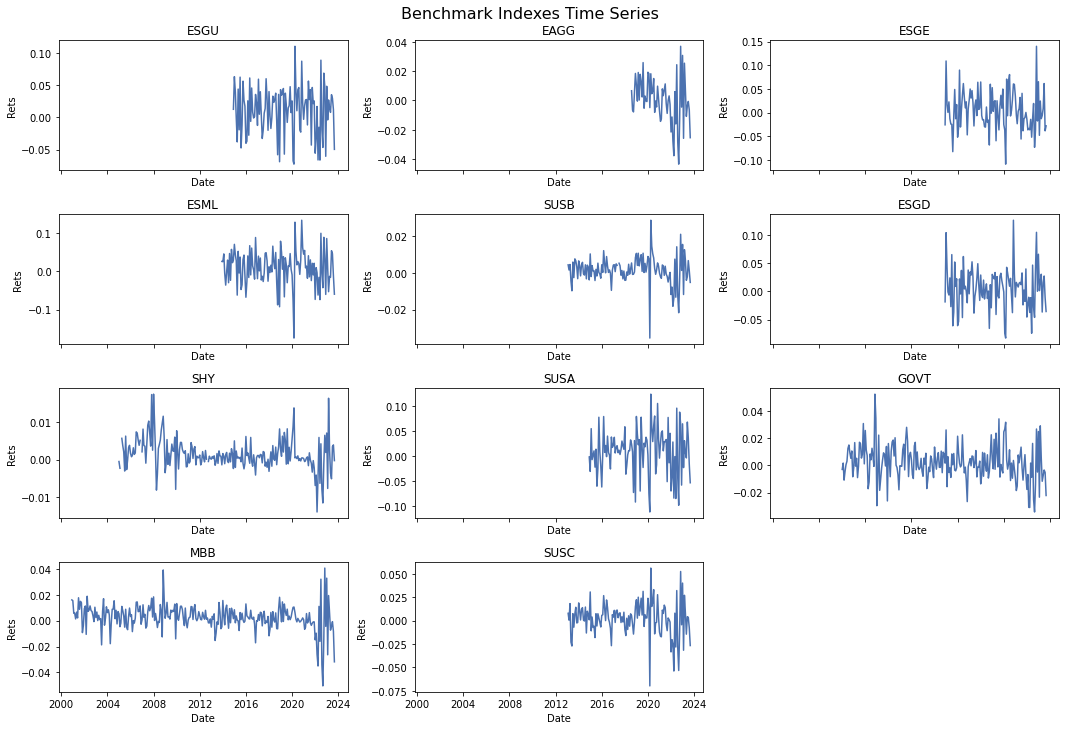

In [301]:
plot_time_series_grid(df_index_rets, title='Benchmark Indexes Time Series',  y_axis_label="Rets" )

#### Time Series plot grid of the ETF's historical monthly returns

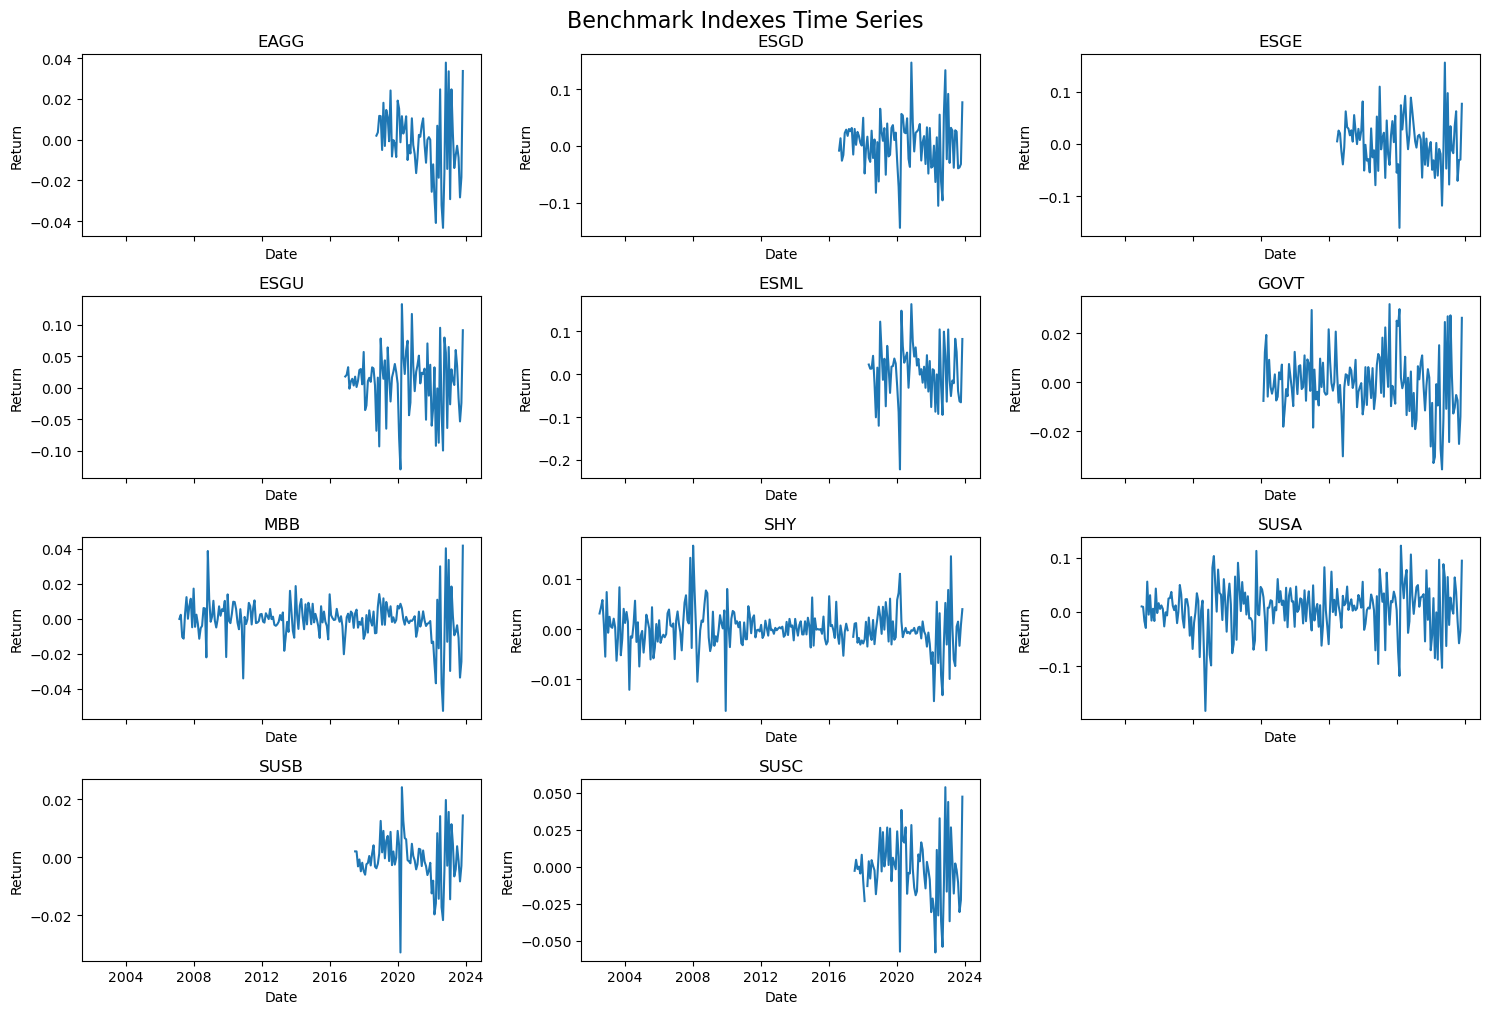

In [3]:
plot_time_series_grid(etf_monthly_rets)

## Tracking error between ETF's and associated benchmark Index 

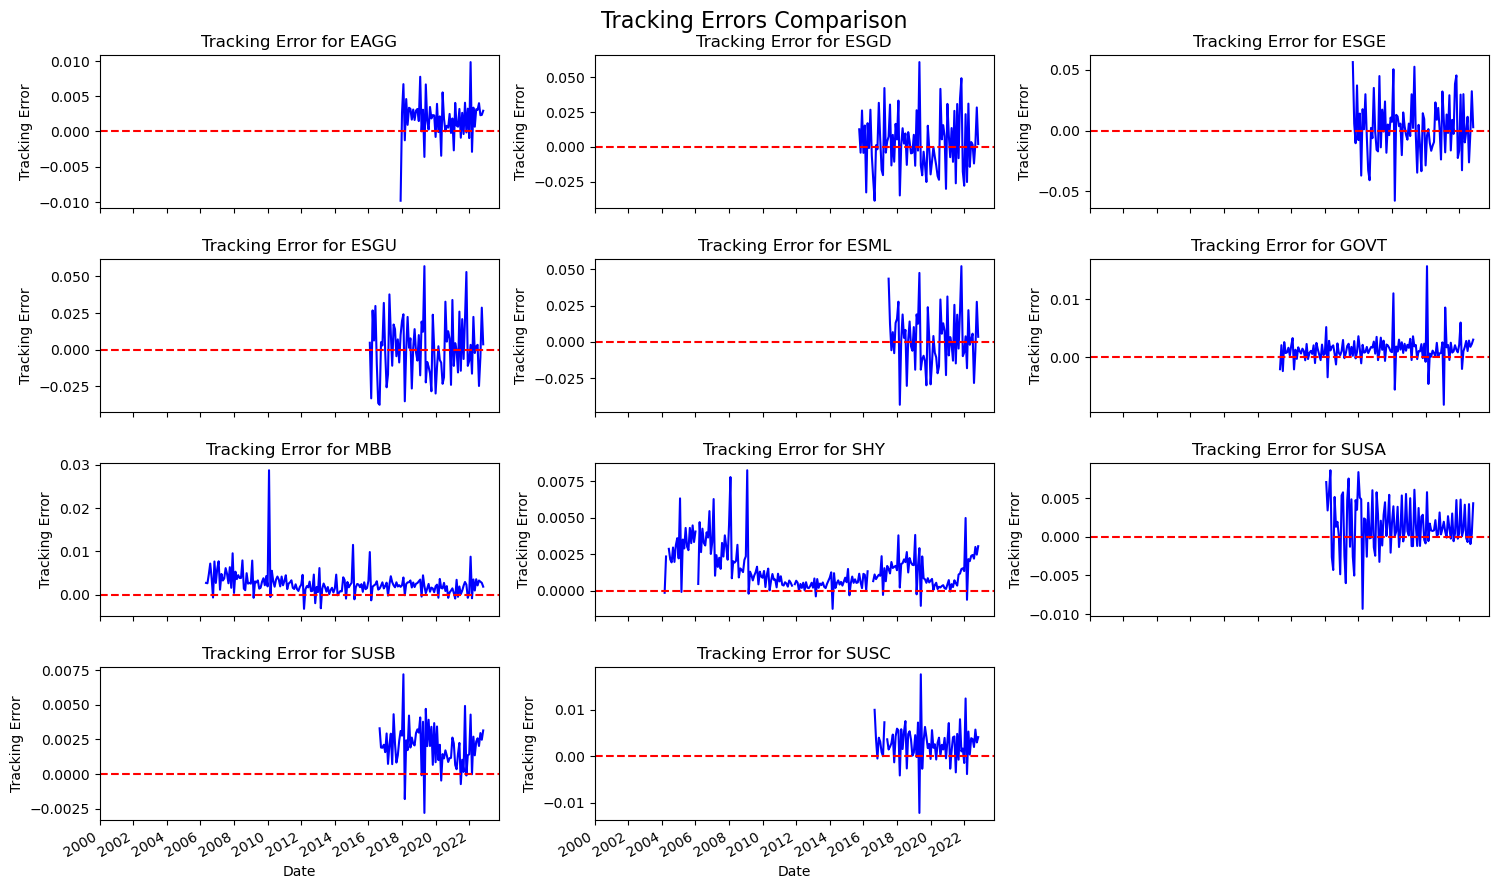

In [4]:
TE_fct(df_index_rets, etf_monthly_rets)

# Imputing data to index dataframe

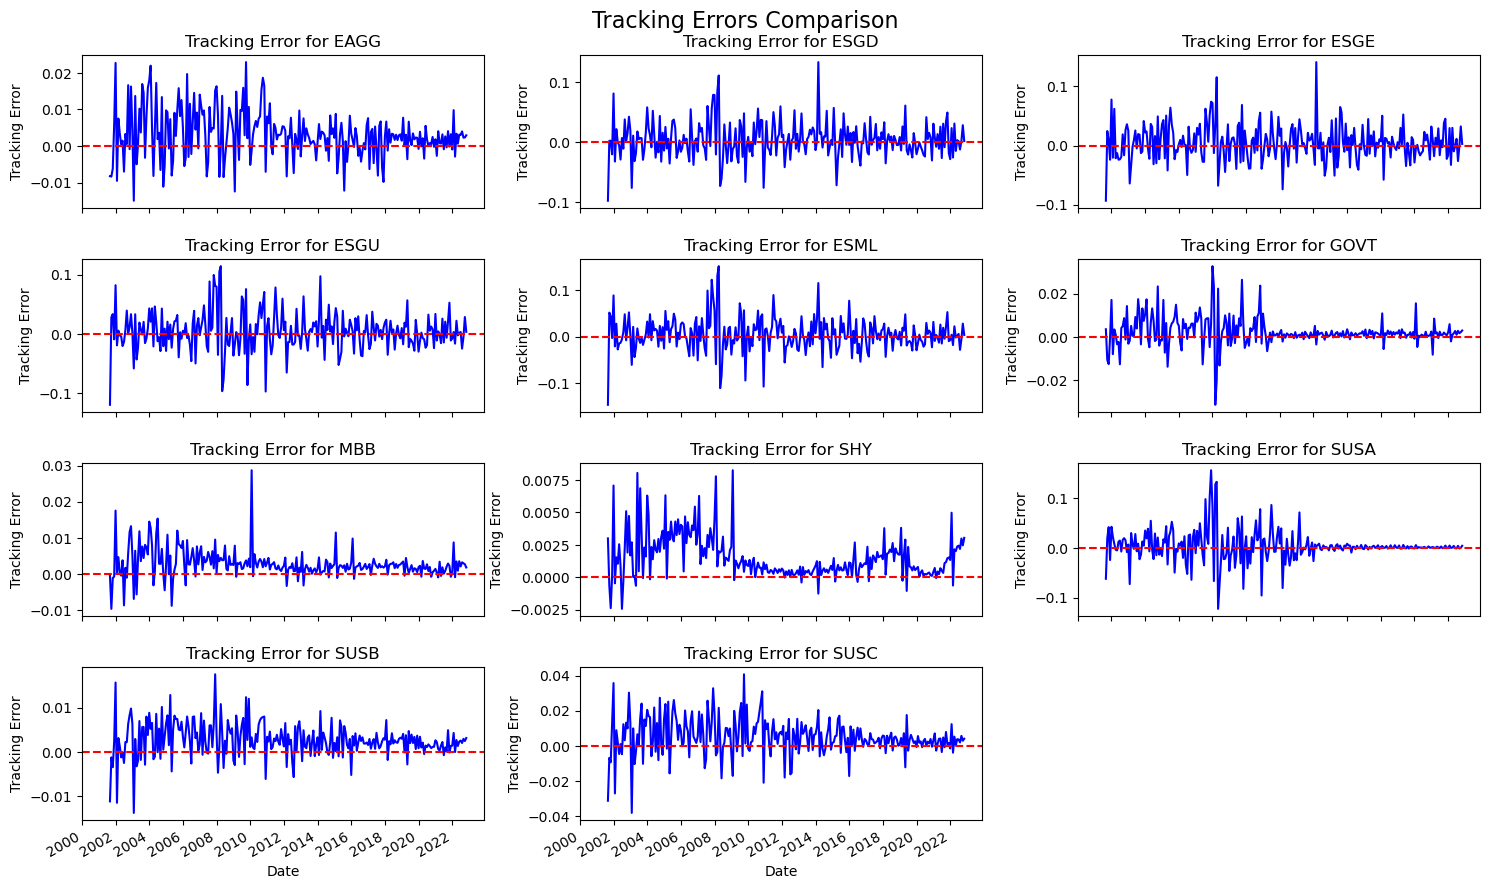

In [5]:
TE_fct(df_imputed_index, df_imputed_etf)

## Input Data Analysis 

#### correlation analysis of the historical monthly returns of the ETF's benchmark index 

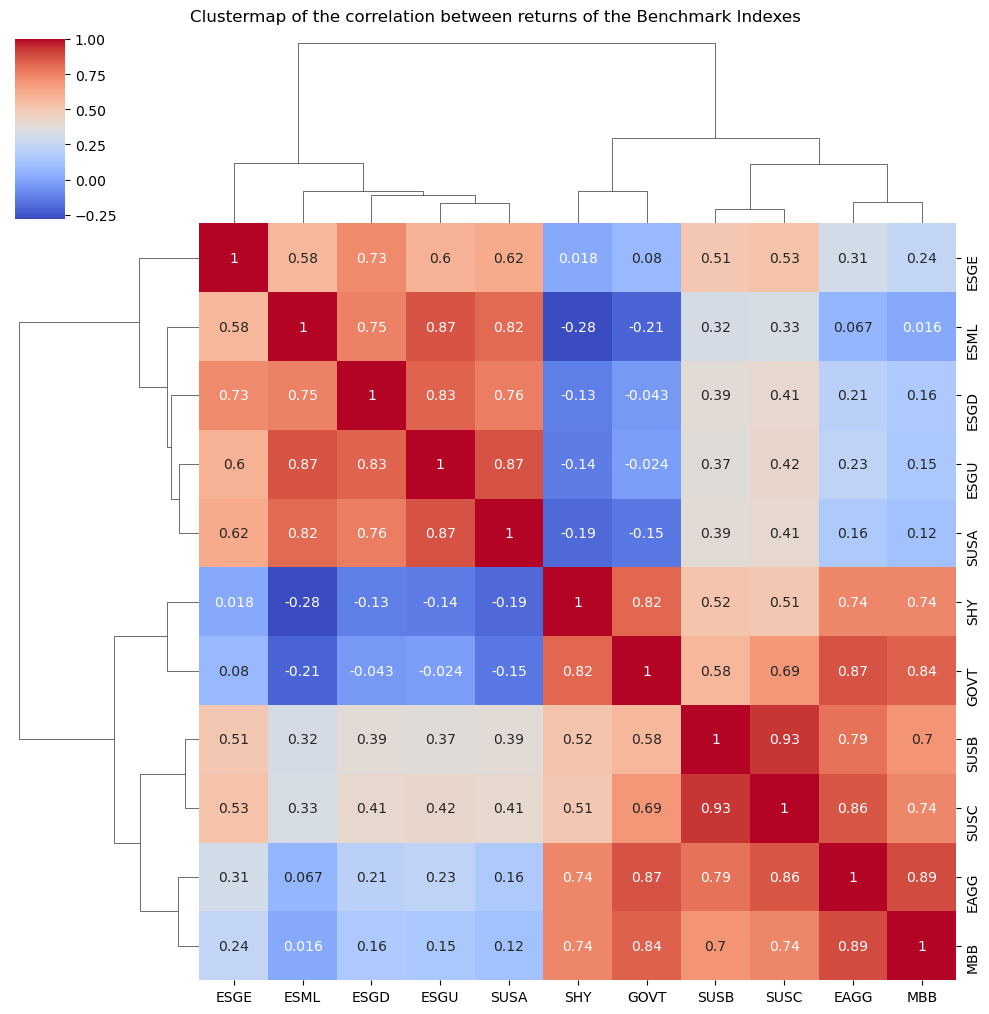

In [6]:
# Clustermap of correlation of benchmark indexes returns
imputed_index_corr = pd.DataFrame(df_imputed_index).corr()
sns.clustermap(imputed_index_corr, annot=True, square=True, cmap='coolwarm')
plt.suptitle('Clustermap of the correlation between returns of the Benchmark Indexes').set_y(1.01)

plt.show();

#### histograms of the Indexes monthly returns 


ESGU
count    275.000000
mean       0.010536
std        0.029195
min       -0.072736
25%       -0.006207
50%        0.015238
75%        0.028516
max        0.110611
Name: ESGU, dtype: float64
Average spread of the benchmark index: 0.18334701034632206
Maximum spread of the benchmark index: 0.18334701034632206
Skewness of the benchmark index: -0.38463261225442436 
Kurtosis of the benchmark index: 0.6260791748998535 

EAGG
count    275.000000
mean       0.003158
std        0.010534
min       -0.043401
25%       -0.001781
50%        0.002470
75%        0.010038
max        0.036925
Name: EAGG, dtype: float64
Average spread of the benchmark index: 0.08032620818975811
Maximum spread of the benchmark index: 0.08032620818975811
Skewness of the benchmark index: -0.6374636817926369 
Kurtosis of the benchmark index: 2.117682517894254 

ESGE
count    275.000000
mean       0.006248
std        0.030828
min       -0.108789
25%       -0.013048
50%        0.007191
75%        0.024655
max        0.140001

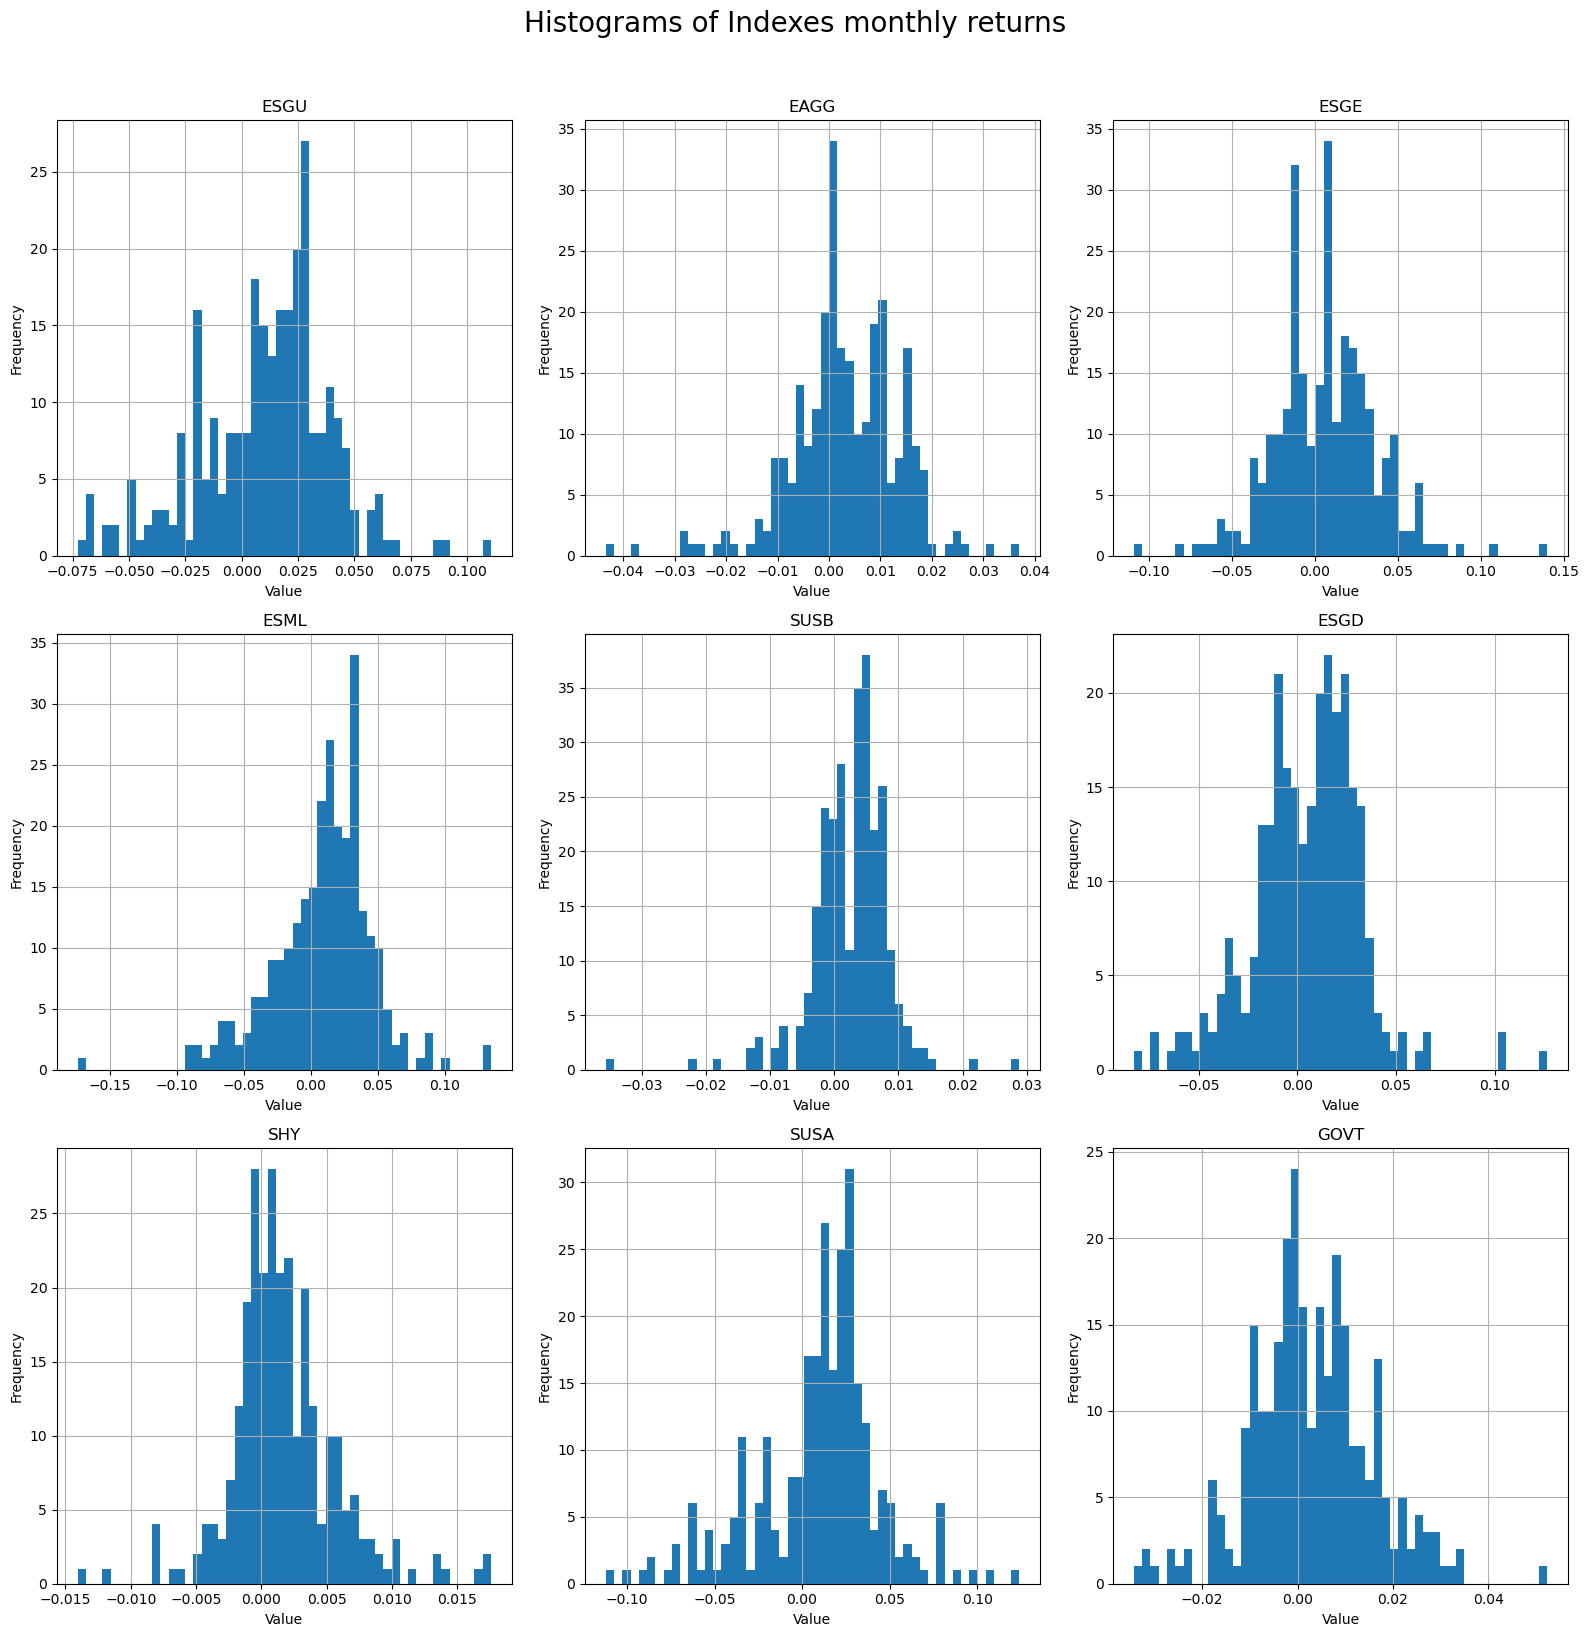

In [13]:

# Get the list of all column names
columns = df_imputed_index.columns

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Histograms of Indexes monthly returns", fontsize=20).set_y(1.02)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through the columns and plot histograms
for i, column in enumerate(columns):
    if i >= num_rows * num_cols:
        break  # Exit the loop if you exceed the number of subplots
    
    ax = axs[i]
    df_imputed_index[column].hist(ax=ax, bins=50)  # You can adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    print(f'\033[1m{column}\033[0m')
    print(df_imputed_index[column].describe())
    print(f'Average spread of the benchmark index: {np.mean(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Maximum spread of the benchmark index: {np.max(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Skewness of the benchmark index: {np.mean(skew(df_imputed_index[column][:], nan_policy="omit"))} ')
    print(f'Kurtosis of the benchmark index: {np.mean(kurtosis(df_imputed_index[column][:], nan_policy="omit"))} ')
    print('', sep='\n')

    # Hide any empty subplots if there are more subplots than columns
    for i in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()



## Machine learning methods to predict next month return
* Random Forest 
* Regression Tree

#### Features historical values analysis 

**Bonds**
 
- **BAMLCC0A0CMTRIV**: ICE BofA US Corporate Index Total Return Index Value <br>
- **BAMLC0A4CBBB**: ICE BofA BBB US Corporate Index Option-Adjusted Spread  <br>
- **BAMLC0A3CA**: ICE BofA Single-A US Corporate Index Option-Adjusted Spread  <br>
- **HQMCB10YR**: 10-Year High Quality Market (HQM) Corporate Bond Spot Rate <br>
- **FEDFUNDS**: Federal Funds Effective Rate <br>
- **T10Y2Y**: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity <br>
- **TB3SMFFM**: 3-Month Treasury Bill Minus Federal Funds Rate <br>
- **T5YFF**: 5-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **T1YFF**: 1-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **DLTIIT**: Treasury Long-Term Average (Over 10 Years), Inflation-Indexed <br>


**Equity Indexes**
- **NASDAQCOM**: NASDAQ Composite Index<br>
- **WILL5000PR**: Wilshire 5000 Price Index<br>
- **WILLLRGCAP**: Wilshire US Large-Cap Total Market<br>
- **WILLSMLCAP**: Wilshire US Small-Cap Total Market Index<br>
- **WILLLRGCAPGR**: Wilshire US Large-Cap Growth Total Market Index<br>
- **WILLLRGCAPVAL**: Wilshire US Large-Cap Value Total Market Index<br>
- **WILLMIDCAP**: Wilshire US Mid-Cap Total Market Index<br>
- **SBPREUE**: S&P Europe LargeMidCap <br>
- **MXEUMC**: MSCI Europe Mid Cap Index (USD)<br>
- **MXEULC**: MSCI Europe Large Cap Index (USD)<br>
- **SPAXLCUP**: S&P Pan Asia Ex-JP, AU, NZ, IN LargeCap Index<br>
- **SBPRAPU**: S&P Asia Pacific LargeMidCap<br>
- **MEMMG**: Morningstar Emerging Markets<br>
- **MXEF**: MSCI Emerging Markets Index<br>
- **MXEFLC**: MSCI Emerging Markets Large Cap Index (USD)<br>
- **MXEFMC**: MSCI Emerging Markets Mid Cap Index (USD)<br>
- **SML**: S&P SmallCap 600<br>


**Other**
- **MSPUS**: Median Sales Price of Houses Sold for the United States <br>
- **CCSA**: Continued Claims (Insured Unemployment) <br>
- **BOPGSTB**: Trade Balance: Goods and Services, Balance of Payments Basis<br>
- **VIXCLS**: CBOE Volatility Index: VIX<br>
- **USSLIND**: Leading Index for the United States<br>
- **USALOLITONOSTSAM**: Leading Indicators OECD: Leading Indicators: Composite Leading Indicator: Normalised for United States<br>
- **UNRATE**: Unemployment Rate<br>
- **STICKCPIM157SFRBATL**: Sticky Price Consumer Price Index less Food and Energy       <br>
- **EMVMACROBUS**: Equity Market Volatility Tracker: Macroeconomic News and Outlook: Business Investment And Sentiment<br>
- **MORTGAGE30US**: 30-Year Fixed Rate Mortgage Average in the United States<br>
- **WILLRESIPR**: Wilshire US Real Estate Securities Price Index (Wilshire US RESI)<br>



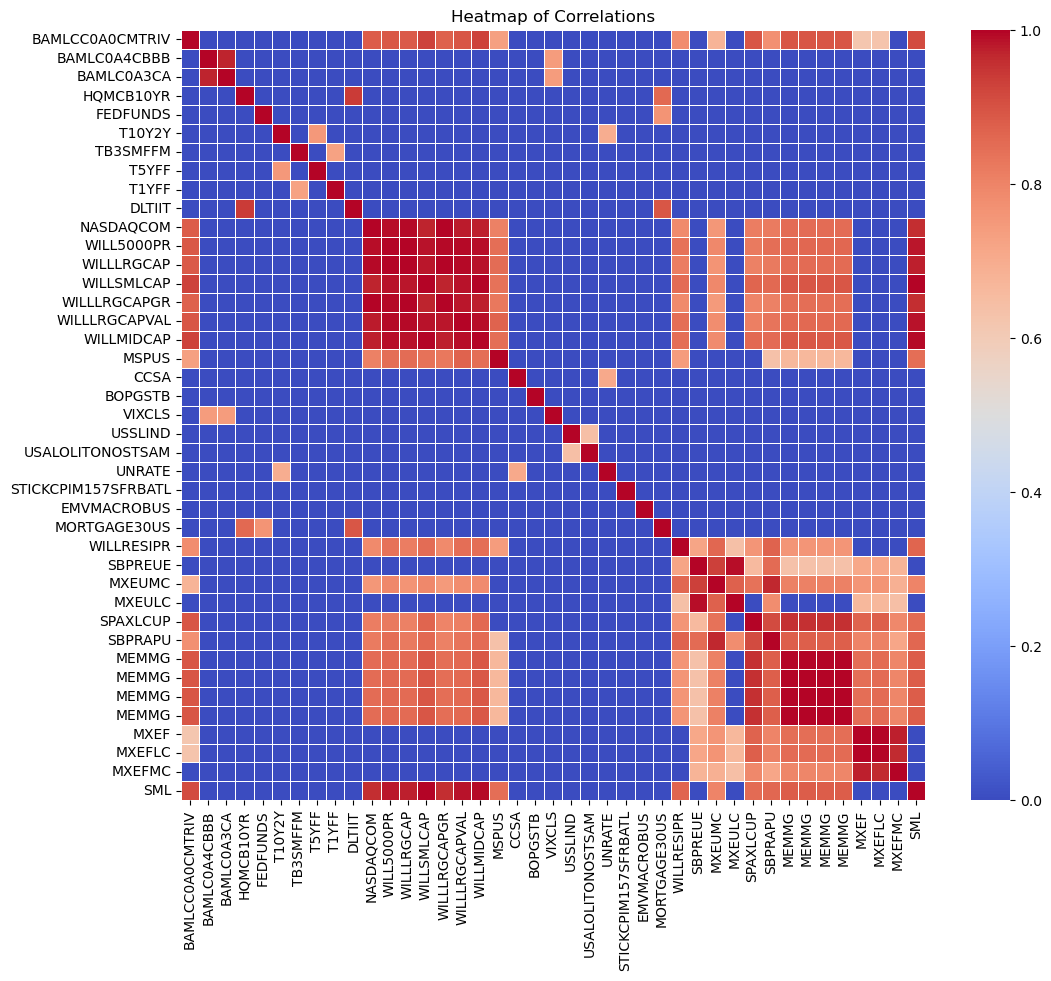

In [15]:
# Set a threshold for correlation
x_corr = pd.DataFrame(x).corr()
threshold = 0.6
x_corr[x_corr < threshold] = 0

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(x_corr, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlations')
plt.show()

We can notice some strong correlations levels are observable among the historical features values. This makes sense since we do expect indeed that interest rate measure move together. This is also true for total market equity indexes used such as S&P500, Wilshire 1000, Wildshire total market, etc.  The following table describe the feature associated with the tick presented in the clustermap. 

## Random Forest

Average Mean Absolute Error using 5-fold cross-validation - Random Forest

Average Mean Absolute Error for ESGU: 0.02491692276152595
Average Mean Absolute Error for EAGG: 0.0076381415521553945
Average Mean Absolute Error for ESGE: 0.024727189580460045
Average Mean Absolute Error for ESML: 0.0284861399202035
Average Mean Absolute Error for SUSB: 0.004109291462465274
Average Mean Absolute Error for ESGD: 0.0221311252723894
Average Mean Absolute Error for SHY: 0.002653465899955376
Average Mean Absolute Error for SUSA: 0.027989104736022247
Average Mean Absolute Error for GOVT: 0.010012160199754722
Average Mean Absolute Error for MBB: 0.00627151317906794
Average Mean Absolute Error for SUSC: 0.010697132512980012


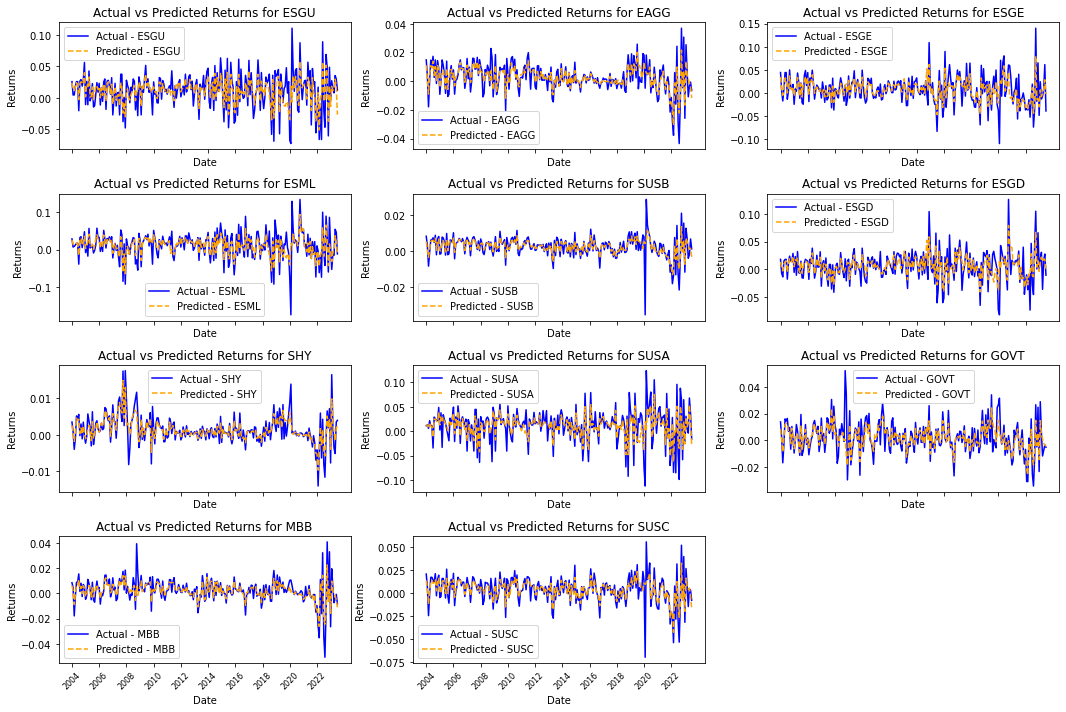

In [5]:
# Number of folds for cross-validation
num_folds = 5

# Create a grid for subplots
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
years = time_serie_plot.str[:4]

print(f'Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRandom Forest\033[0m')
print('', sep='/n')

# Iterate over each index
for i, ticker in enumerate(ticker_list):
    # Extract features and target variable for the current stock
    x = merged_df[features_list]
    y = merged_df[ticker]
    
    # Standardize features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # K-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Initialize model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Lists to store evaluation metrics
    mae_list = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list = []
    predicted_returns_list = []
    
    # Iterate over folds
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Model Training
        rf_model.fit(X_train, y_train)
        
        # Model Prediction
        y_pred = rf_model.predict(X_test)
        
        # Evaluate Model Performance
        mae = mean_absolute_error(y_test, y_pred)
        mae_list.append(mae)
        
        # Store actual and predicted returns for plotting
        actual_returns_list.extend(y_test)
        predicted_returns_list.extend(y_pred)
    
    # Calculate average MAE across folds for the current stock
    average_mae = sum(mae_list) / len(mae_list)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae}')
    
    # Predict returns for the entire period
    predicted_returns = rf_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame
    predicted_returns_df[ticker] = predicted_returns

    # Plot the actual and predicted time series only if there is data
    if not y.empty:
        ax = axes[i]
        ax.plot(time_serie_plot, y, label=f'Actual - {ticker}', color='blue')
        ax.plot(time_serie_plot, predicted_returns, label=f'Predicted - {ticker}', linestyle='--', color='orange')
        ax.set_title(f'Actual vs Predicted Returns for {ticker}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns')
        ax.legend()

        # Adjust x-axis labels
        ax.set_xticks(time_serie_plot[::24])  # Set x-axis ticks every 24 months
        ax.set_xticklabels(years[::24], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Regression Tree

Average Mean Absolute Error using {num_folds}-fold cross-validation - Regression Tree

Average Mean Absolute Error for ESGU: 0.03220926982036944
Average Mean Absolute Error for EAGG: 0.009831701917084759
Average Mean Absolute Error for ESGE: 0.03529745993422706
Average Mean Absolute Error for ESML: 0.03629265054270764
Average Mean Absolute Error for SUSB: 0.005346452206010157
Average Mean Absolute Error for ESGD: 0.03184655800077078
Average Mean Absolute Error for SHY: 0.0034254959570877547
Average Mean Absolute Error for SUSA: 0.03841441317768759
Average Mean Absolute Error for GOVT: 0.012838883884465562
Average Mean Absolute Error for MBB: 0.008727609017713606
Average Mean Absolute Error for SUSC: 0.01546950109564757


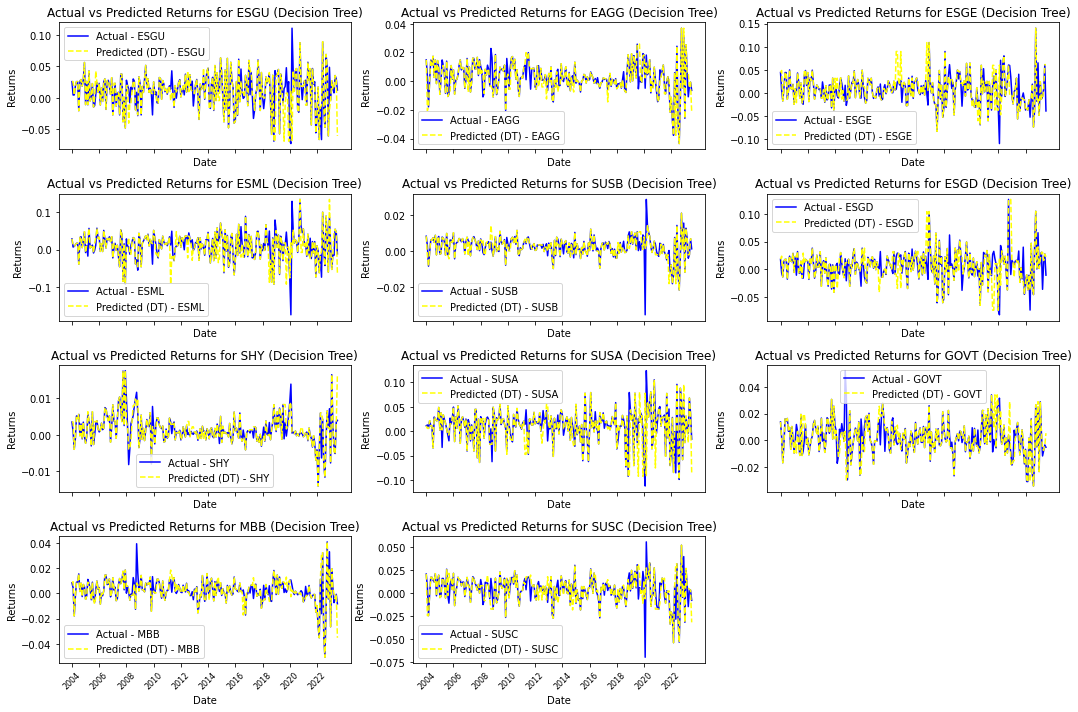

In [4]:
# Create a 4x3 grid for subplots for Decision Tree
fig_dt, axes_dt = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
axes_dt = axes_dt.flatten()
print('Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRegression Tree\033[0m')
print('', sep='/n')

for i, ticker in enumerate(ticker_list):
    # Initialize Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    
    # Lists to store evaluation metrics
    mae_list_dt = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list_dt = []
    predicted_returns_list_dt = []
    
    # K-fold cross-validation for Decision Tree
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = merged_df[ticker].iloc[train_index], merged_df[ticker].iloc[test_index]
        
        # Model Training for Decision Tree
        dt_model.fit(X_train, y_train)
        
        # Model Prediction for Decision Tree
        y_pred_dt = dt_model.predict(X_test)
        
        # Evaluate Model Performance
        mae_dt = mean_absolute_error(y_test, y_pred_dt)
        mae_list_dt.append(mae_dt)
        
        # Store actual and predicted returns for Decision Tree
        actual_returns_list_dt.extend(y_test)
        predicted_returns_list_dt.extend(y_pred_dt)
    
    # Calculate average MAE across folds for the current stock
    average_mae_dt = sum(mae_list_dt) / len(mae_list_dt)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae_dt}')
    
    # Predict returns for the entire period using Decision Tree
    predicted_returns_dt = dt_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame for Decision Tree
    predicted_returns_df_dt[ticker] = predicted_returns_dt
    
    # Plot the actual and predicted time series for Decision Tree
    ax = axes_dt[i]
    ax.plot(time_serie_plot, merged_df[ticker], label=f'Actual - {ticker}', color='blue')
    ax.plot(time_serie_plot, predicted_returns_dt, label=f'Predicted (DT) - {ticker}', linestyle='--', color='yellow')
    ax.set_title(f'Actual vs Predicted Returns for {ticker} (Decision Tree)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.legend()

    # Adjust x-axis labels
    ax.set_xticks(time_serie_plot[::24])  # Set x-axis ticks every 24 months
    ax.set_xticklabels(years[::24], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes_dt)):
    axes_dt[j].axis('off')

# Adjust layout for Decision Tree
plt.tight_layout()
plt.show()

## Monthly returns predictions 

The following Dataframes containt the monthly return predictions made by the respective machine learning method based on the previous month feature values. 

In [10]:
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2004-02,0.023759,0.011044,0.034774,0.025551,0.005251,0.013183,0.002572,0.014297,0.008512,0.006183,0.014011
2004-03,0.014747,0.000641,0.009575,0.013796,0.001054,0.003354,0.000249,0.010084,0.000370,0.001876,0.005155
2004-04,0.011440,-0.008952,-0.004752,0.012909,-0.003608,-0.003166,-0.001836,0.009557,-0.008782,-0.008832,-0.011731
2004-05,0.017449,0.004958,0.013077,0.013061,0.000963,0.009442,0.000728,0.016874,0.002624,-0.000450,0.001701
2004-06,0.023912,0.010788,0.032556,0.017989,0.005418,0.012608,0.004583,0.010057,0.011851,0.006552,0.013814
...,...,...,...,...,...,...,...,...,...,...,...
2023-04,0.011572,0.004476,-0.007351,-0.005445,0.005400,0.021770,0.003082,0.008945,0.004809,0.002496,0.006819
2023-05,0.014035,0.001500,-0.001150,-0.000683,0.003021,0.013641,0.000942,0.016399,0.001058,-0.001104,0.004631
2023-06,0.029532,-0.001173,0.007178,0.037012,0.000941,0.018664,-0.001641,0.053662,-0.002226,-0.001678,0.005682
2023-07,0.017799,-0.003869,0.028717,0.020252,0.001471,0.017767,0.001615,0.020507,-0.003529,-0.005339,-0.002689


In [12]:
# Regression Tree predicted Monthly returns for each Index (ETF): 
predicted_returns_df

ranked_returns = predicted_returns_df.rank(axis=1, ascending=False, method='max')
ranked_returns


,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2004-02,3.0,7.0,1.0,2.0,10.0,6.0,11.0,4.0,8.0,9.0,5.0
2004-03,1.0,9.0,4.0,2.0,8.0,6.0,11.0,3.0,10.0,7.0,5.0
2004-04,2.0,10.0,7.0,1.0,6.0,5.0,4.0,3.0,8.0,9.0,11.0
2004-05,1.0,6.0,3.0,4.0,9.0,5.0,10.0,2.0,7.0,11.0,8.0
2004-06,2.0,7.0,1.0,3.0,10.0,5.0,11.0,8.0,6.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04,2.0,7.0,11.0,10.0,5.0,1.0,8.0,3.0,6.0,9.0,4.0
2023-05,2.0,6.0,11.0,9.0,5.0,3.0,8.0,1.0,7.0,10.0,4.0
2023-06,3.0,8.0,5.0,2.0,7.0,4.0,9.0,1.0,11.0,10.0,6.0
2023-07,4.0,10.0,1.0,3.0,7.0,5.0,6.0,2.0,9.0,11.0,8.0


In [13]:
# Random forest predicted Monthly returns for each Index (ETF): 
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2004-02,0.023759,0.011044,0.034774,0.025551,0.005251,0.013183,0.002572,0.014297,0.008512,0.006183,0.014011
2004-03,0.014747,0.000641,0.009575,0.013796,0.001054,0.003354,0.000249,0.010084,0.000370,0.001876,0.005155
2004-04,0.011440,-0.008952,-0.004752,0.012909,-0.003608,-0.003166,-0.001836,0.009557,-0.008782,-0.008832,-0.011731
2004-05,0.017449,0.004958,0.013077,0.013061,0.000963,0.009442,0.000728,0.016874,0.002624,-0.000450,0.001701
2004-06,0.023912,0.010788,0.032556,0.017989,0.005418,0.012608,0.004583,0.010057,0.011851,0.006552,0.013814
...,...,...,...,...,...,...,...,...,...,...,...
2023-04,0.011572,0.004476,-0.007351,-0.005445,0.005400,0.021770,0.003082,0.008945,0.004809,0.002496,0.006819
2023-05,0.014035,0.001500,-0.001150,-0.000683,0.003021,0.013641,0.000942,0.016399,0.001058,-0.001104,0.004631
2023-06,0.029532,-0.001173,0.007178,0.037012,0.000941,0.018664,-0.001641,0.053662,-0.002226,-0.001678,0.005682
2023-07,0.017799,-0.003869,0.028717,0.020252,0.001471,0.017767,0.001615,0.020507,-0.003529,-0.005339,-0.002689


## Historical Monthly returns 

In [7]:
# Filled Index monthly returns used as proxy of the ETF 
df_imputed_index

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
Date,,,,,,,,,,,
2000-11,0.010743,0.000241,0.004480,0.009573,0.001533,0.005718,0.001469,0.009495,0.002078,0.002699,0.001814
2000-12,-0.020554,0.017336,-0.013169,-0.038916,0.007573,-0.018144,0.007726,-0.034266,0.022568,0.016101,0.014315
2001-01,-0.020554,0.017336,-0.013169,-0.038916,0.007573,-0.018144,0.005722,-0.034266,0.018901,0.015569,0.014315
2001-02,0.017133,0.010018,-0.012107,-0.001508,0.004769,-0.000799,0.001487,0.019849,0.005747,0.005726,0.010691
2001-03,0.017133,0.010018,-0.012107,-0.001508,0.004581,-0.000799,0.002067,0.019849,0.005772,0.005804,0.009856
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.007790,-0.010849,-0.006359,-0.015336,-0.004040,-0.036580,-0.003642,-0.003863,-0.011722,-0.007327,-0.014471
2023-06,0.035321,-0.003571,0.008918,0.054402,-0.002137,0.015630,-0.005155,0.067937,-0.007496,-0.004266,0.004196
2023-07,0.029793,-0.000672,0.061386,0.046461,0.006721,0.027444,0.003486,0.036107,-0.003442,-0.000746,0.003532


In [8]:
# Actual monthly hoistorical returns of the ETFs
etf_monthly_rets

,EAGG,ESGD,ESGE,ESGU,ESML,GOVT,MBB,SHY,SUSA,SUSB,SUSC
Date,,,,,,,,,,,
2002-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003086,NaN,NaN,NaN
2002-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004307,NaN,NaN,NaN
2002-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005759,NaN,NaN,NaN
2002-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000975,NaN,NaN,NaN
2002-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005477,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-07,-0.002968,0.025093,0.062915,0.034886,0.052083,-0.005240,-0.003753,0.000493,0.037057,0.003764,-0.002199
2023-08,-0.008718,-0.039192,-0.070791,-0.016359,-0.039069,-0.007463,-0.010977,0.001479,-0.016579,-0.001250,-0.010577
2023-09,-0.028314,-0.037589,-0.030730,-0.053422,-0.062935,-0.025210,-0.033732,-0.003323,-0.057906,-0.008344,-0.030735


# Remi's 

In [14]:
# Assuming your DataFrame is named df_imputed_index
# Assuming your index is a PeriodIndex

# Define the start and end dates
start_date = '2001-01'
end_date = '2014-02'

# Convert the start and end dates to Timestamp objects
start_date_timestamp = pd.Timestamp(start_date)
end_date_timestamp = pd.Timestamp(end_date)

# Create an empty list to store DataFrames
rets_list = []

# Set the fixed length of each DataFrame
window_size = 108

# Iterate through each period
current_date = start_date_timestamp
while current_date < end_date_timestamp:
    # Filter the DataFrame for the current month and maintain the fixed length
    rets = df_imputed_index[
        (df_imputed_index.index.to_timestamp() >= current_date)].iloc[:window_size]

    # Append the DataFrame to the list
    rets_list.append(rets.copy())

    # Move to the next month
    current_date += pd.DateOffset(months=1)

# Display the list of DataFrames
for i, rets_df in enumerate(rets_list):
    print(f"DataFrame {i + 1}:\n{rets_df}\n")


DataFrame 1:
             ESGU      EAGG      ESGE      ESML      SUSB      ESGD       SHY  \
Date                                                                            
2001-01 -0.020554  0.017336 -0.013169 -0.038916  0.007573 -0.018144  0.005722   
2001-02  0.017133  0.010018 -0.012107 -0.001508  0.004769 -0.000799  0.001487   
2001-03  0.017133  0.010018 -0.012107 -0.001508  0.004581 -0.000799  0.002067   
2001-04  0.019556  0.001342 -0.005001  0.029985  0.003470  0.010435 -0.000544   
2001-05  0.044294  0.013605  0.010370  0.048329  0.008800  0.029853  0.003707   
...           ...       ...       ...       ...       ...       ...       ...   
2009-08  0.015860  0.007895 -0.009756  0.026701  0.005181 -0.009394  0.004165   
2009-09  0.030118  0.008750  0.015406  0.041167  0.003748  0.012819  0.002340   
2009-10  0.008662  0.007032  0.029243  0.009865  0.005019  0.009442  0.002228   
2009-11  0.015238  0.011174  0.016433  0.027180  0.006349  0.000671  0.006034   
2009-12  0.0068

In [15]:
rets_list[-1]

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
Date,,,,,,,,,,,
2014-01,0.042231,0.012151,0.025970,0.025758,0.006565,0.032325,0.001619,0.043835,0.013448,0.015633,0.018913
2014-02,0.046962,0.001084,0.032775,0.046033,0.003728,0.023611,0.000909,0.033053,0.002612,0.003442,0.010134
2014-03,-0.006223,-0.000220,0.006716,-0.004817,-0.001632,0.002987,-0.001110,-0.008254,-0.002814,-0.003214,0.000682
2014-04,-0.016902,0.003996,0.001194,-0.035661,0.004511,-0.017879,0.001314,0.005188,0.005539,0.009243,0.012144
2014-05,0.022546,0.010058,-0.003347,-0.000748,0.005772,0.015230,0.001917,0.022105,0.009354,0.012033,0.013861
...,...,...,...,...,...,...,...,...,...,...,...
2022-08,-0.019178,-0.028035,0.019276,-0.005474,-0.012281,-0.028205,-0.007985,-0.042638,-0.025136,-0.034193,-0.028854
2022-09,-0.046763,-0.043401,-0.073233,-0.042511,-0.021756,-0.046057,-0.011648,-0.098618,-0.034284,-0.050513,-0.053247
2022-10,0.068835,-0.012923,-0.036229,0.089465,-0.003321,0.040454,-0.001054,0.087877,-0.014083,-0.014246,-0.010280


## Min Variance optim based on historical rets and cov

Build the linear constraint based on the ESG rating

In [17]:
import pandas as pd
from riskfolio import factors_constraints

# Your DataFrame
ESG_constraint_data = {
    'ESG Fund Rating': [6.6, 8.6, 7.1, 7.3, 6.5, 5.7, 6, 5.7, 8.2, 7.9, 7.6],
}

ESG_constraint = pd.DataFrame(ESG_constraint_data)

# Define the constraints based on your DataFrame
constraints = pd.DataFrame({
    'Disabled': [False],
    'Factor': ['ESG Fund Rating'],
    'Sign': ['>='],
    'Value': [7],
    'Relative Factor': '',
})

# Create the factors constraints matrices C and D
C, D = factors_constraints(constraints, loadings=ESG_constraint)



In [18]:
# Building the portfolio object nea== minimal number of assets to include
port = rp.Portfolio(returns=rets,ainequality = C, binequality = D, nea = 6)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

'''
model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector
'''

"\nmodel = 'Classic' # Could be Classic (historical) or FM (Factor Model)\nrm = 'MV' # Risk measure used, this time will be variance\nobj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe\nhist = True # Use historical scenarios for risk measures that depend on scenarios\nrf = 0 # Risk free rate\nb = None # Risk contribution constraints vector\n"

## Minimum Variance Portfolio

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
weights,0.013609,0.14126,0.005471,0.020669,0.192204,0.025291,0.246267,1.113214e-08,0.148662,0.150215,0.056352


The weighted average ESG rating of this portfolio is 7.199470757817428


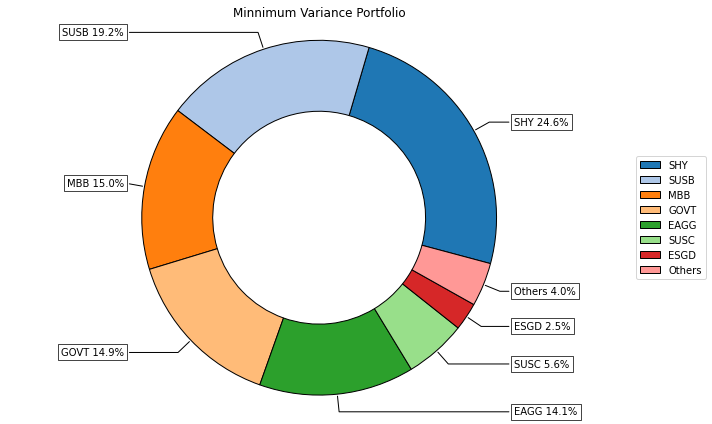

In [394]:
# Building the portfolio object nea== minimal number of assets to include
port = rp.Portfolio(returns=rets_list[i],ainequality = C, binequality = D, nea = 6)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Minnimum Variance Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_weights = w['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

## Risk Parity Portfolio

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
weights,0.041103,0.097582,0.035436,0.039743,0.155702,0.049136,0.240087,0.041549,0.103056,0.130136,0.06647


The weighted average ESG rating of this portfolio is 7.000000063748114


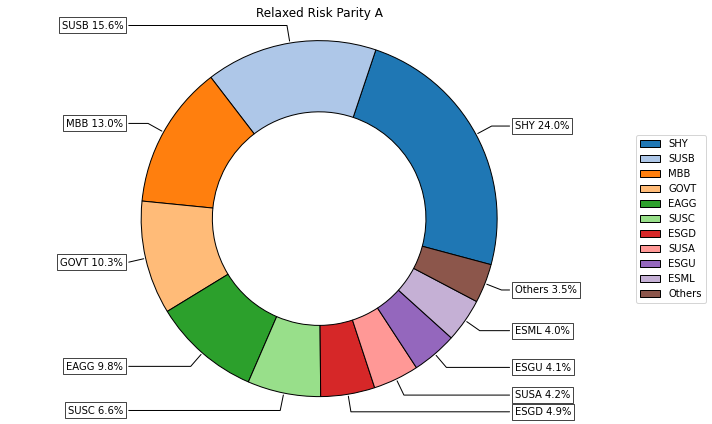

In [320]:
version = 'A' # Could be A, B or C

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b= None, hist=hist)

display(w_rrp_a.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_rrp_a_weights = w_rrp_a['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_rrp_a_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
a1 = rp.Sharpe_Risk(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05)
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')


# Views on Black Litterman Portfolio

In [104]:
asset_classes = {'Assets':["ESGU", "EAGG", "ESGE", "ESML", "SUSB", "ESGD", "SHY", "SUSA", "GOVT", "MBB", "SUSC"]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False],
         'Type': ['Assets', 'Assets'],
         'Set': ['', ''],
         'Position': ['SHY', 'ESGE'],
         'Sign': ['<=', '<='],
         'Return': [0.05, 0.05], # Annual terms 
         'Type Relative': [ 'Assets', 'Assets'],
         'Relative Set': [ '', ''],
         'Relative': ["MBB", "SUSC"]
}

views = pd.DataFrame(views)

display(views)

P,Q = rp.assets_views(views, asset_classes)

,Disabled,Type,Set,Position,Sign,Return,Type Relative,Relative Set,Relative
0,False,Assets,,SHY,<=,0.05,Assets,,MBB
1,False,Assets,,ESGE,<=,0.05,Assets,,SUSC


In [105]:
P,Q = rp.assets_views(views, asset_classes)

## Black Litterman optimization

In [107]:


# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/12, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
weights,0.01892,0.140318,0.0544,0.016414,0.193479,0.023813,0.225227,0.021348,0.148805,0.148216,0.009061


In [163]:
start_date_timestamp

Timestamp('2019-08-01 00:00:00')

In [30]:
# Assuming you have initialized your DataFrames for minimum variance and Black Litterman results
monthly_min_variance = pd.DataFrame(columns=['Date', 'ESG Score'] + list(rets.columns))
monthly_bl_variance = pd.DataFrame(columns=['Date', 'ESG Score'] + list(rets.columns))

# Define the start and end dates
start_date = '2010-01'
end_date = '2023-01'

# Convert the start and end dates to Timestamp objects
start_date_timestamp = pd.Timestamp(start_date)
end_date_timestamp = pd.Timestamp(end_date)

# Get relative ranking 
relative_ranking = ranked_returns.loc[start_date:]


asset_classes = {'Assets':["ESGU", "EAGG", "ESGE", "ESML", "SUSB", "ESGD", "SHY", "SUSA", "GOVT", "MBB", "SUSC"]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])



# Iterate over the rolling windows
while start_date_timestamp < end_date_timestamp:
    # Filter the DataFrame for the current month for minimum variance optimization
    rets_df = df_imputed_index[
        (df_imputed_index.index.to_timestamp() < start_date_timestamp) &
        (df_imputed_index.index.to_timestamp() >= start_date_timestamp - pd.DateOffset(months=108))
    ]

    # Building the portfolio object for minimum variance optimization
    port_min_variance = rp.Portfolio(returns=rets_df, ainequality=C, binequality=D, nea=6)

    # Select method and estimate input parameters for minimum variance optimization
    method_mu = 'hist'
    method_cov = 'hist'
    port_min_variance.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model_min_variance = 'Classic'
    rm_min_variance = 'MV'
    obj_min_variance = 'MinRisk'
    hist_min_variance = True
    rf_min_variance = 0
    l_min_variance = 0

    # Perform minimum variance optimization
    w_min_variance = port_min_variance.optimization(model=model_min_variance, rm=rm_min_variance, obj=obj_min_variance, rf=rf_min_variance, l=l_min_variance, hist=hist_min_variance)

    # Calculate the ESG Score for the minimum variance portfolio
    w_min_variance_weights = w_min_variance['weights'].values.reshape(1, -1)
    esg_ratings_min_variance = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)
    ESG_Rating_portfolio_min_variance = w_min_variance_weights.dot(esg_ratings_min_variance).item()

    # Create a dictionary to store the results for the minimum variance portfolio
    result_dict_min_variance = {
        'Date': start_date_timestamp + pd.DateOffset(months=108),
        'ESG Score': ESG_Rating_portfolio_min_variance
    }

    # Add weights for each ETF to the dictionary
    result_dict_min_variance.update(dict(zip(rets.columns, w_min_variance['weights'].values)))

    # Append the results for the minimum variance portfolio to its own DataFrame
    monthly_min_variance = monthly_min_variance.append(result_dict_min_variance, ignore_index=True)


    # Extract top 2 and bottom 2 assets based on rankings for the specific date
    top_assets = relative_ranking.loc[start_date_timestamp].nsmallest(2).index
    bottom_assets = relative_ranking.loc[start_date_timestamp].nlargest(2).index



    # Create views with dynamic positions and relatives
    views = {
        'Disabled': [False, False],
        'Type': ['Assets', 'Assets'],
        'Set': ['', ''],
        'Position': [top_assets[0], top_assets[1]],
        'Sign': ['>=', '>='],
        'Return': [0.05, 0.05],  # Annual terms
        'Type Relative': ['Assets', 'Assets'],
        'Relative Set': ['', ''],
        'Relative': [bottom_assets[0], bottom_assets[1]]
    }

    views_df = pd.DataFrame(views)


    # Get the P, Q matrices from the views
    P, Q = rp.assets_views(views_df, asset_classes)

    # Estimate Black Litterman inputs for minimum variance portfolio
    port_min_variance.blacklitterman_stats(P, Q/12, rf=rf_min_variance, w=w_min_variance['weights'].to_frame(), delta=None, eq=True)
    model_bl_min_variance = 'BL'  # Black Litterman
    rm_bl_min_variance = 'MV'  # Risk measure used, this time will be variance
    obj_bl_min_variance = 'Sharpe'  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist_bl_min_variance = False  # Use historical scenarios for risk measures that depend on scenarios

    # Perform Black Litterman optimization for minimum variance portfolio
    w_bl_min_variance = port_min_variance.optimization(model=model_bl_min_variance, rm=rm_bl_min_variance, obj=obj_bl_min_variance, rf=rf_min_variance, l=l_min_variance, hist=hist_bl_min_variance)

    # Calculate the ESG Score for the Black Litterman portfolio
    w_bl_weights_min_variance = w_bl_min_variance['weights'].values.reshape(1, -1)
    esg_ratings_bl_min_variance = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)
    ESG_Rating_portfolio_bl_min_variance = w_bl_weights_min_variance.dot(esg_ratings_bl_min_variance).item()

    # Create a dictionary to store the results for the Black Litterman portfolio
    result_dict_bl_min_variance = {
        'Date': start_date_timestamp,
        'ESG Score': ESG_Rating_portfolio_bl_min_variance
    }

    # Add weights for each ETF to the dictionary
    result_dict_bl_min_variance.update(dict(zip(rets.columns, w_bl_min_variance['weights'].values)))

    # Append the results for the Black Litterman portfolio to its own DataFrame
    monthly_bl_variance = monthly_bl_variance.append(result_dict_bl_min_variance, ignore_index=True)

    # Update the start date for the next iteration
    start_date_timestamp += pd.DateOffset(months=1)



In [32]:
monthly_bl_variance

,Date,ESG Score,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
0,2010-01-01,7.182949,1.871288e-08,0.136810,4.781631e-09,3.991532e-02,0.185616,4.132826e-09,0.249613,2.776154e-02,0.100830,1.797320e-01,0.079722
1,2010-02-01,7.088612,3.302911e-04,0.134580,1.413821e-03,4.453066e-02,0.192037,4.596315e-02,0.260257,5.794355e-03,0.071390,1.719494e-01,0.071754
2,2010-03-01,7.147547,7.742145e-08,0.137390,3.280951e-02,3.959131e-02,0.180603,2.186078e-08,0.262819,2.610757e-02,0.089145,1.791028e-01,0.052432
3,2010-04-01,7.201336,3.039320e-08,0.140273,5.209095e-09,8.420331e-02,0.176496,4.091780e-09,0.250051,1.664990e-02,0.094473,1.850107e-01,0.052844
4,2010-05-01,7.000000,4.214085e-02,0.051557,2.745916e-09,2.728904e-02,0.251450,3.618761e-02,0.209703,2.087428e-02,0.101147,1.954005e-01,0.064251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,7.176843,3.438595e-03,0.146778,3.927296e-02,5.784374e-03,0.186287,3.274157e-02,0.242896,6.063406e-03,0.120005,1.671701e-01,0.049562
152,2022-09-01,7.449904,9.480657e-07,0.172748,1.406347e-08,4.683173e-02,0.165417,9.753441e-08,0.181201,2.288355e-07,0.168754,2.061175e-01,0.058930
153,2022-10-01,7.474303,1.373431e-06,0.169572,3.382190e-08,4.930509e-02,0.154246,1.714634e-07,0.179003,3.220977e-07,0.194444,1.964478e-01,0.056980
154,2022-11-01,7.392289,1.447463e-02,0.241568,1.040834e-01,4.503685e-07,0.155749,3.956210e-02,0.126361,8.901266e-08,0.109843,1.960797e-07,0.208358


In [82]:
    # Building the portfolio object for Black Litterman optimization
    port_bl = rp.Portfolio(returns=rets_df, ainequality=C, binequality=D, nea=6)

    # Estimate Black Litterman inputs:
    port.blacklitterman_stats(P, Q/12, rf=rf_min_variance, w=w_min_variance['weights'].to_frame(), delta=None, eq=True)

The weighted average ESG rating of this BL portfolio is 7.09092883447157


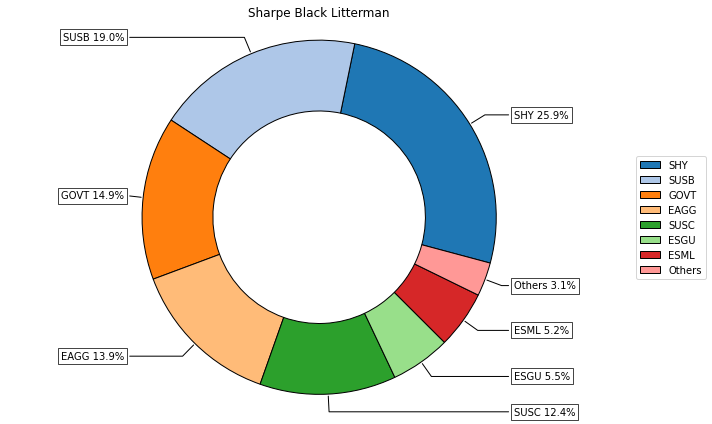

In [324]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

w_bl_weights = w_bl['weights'].values.reshape(1, -1)

ESG_Rating_BLportfolio = w_bl_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this BL portfolio is {ESG_Rating_BLportfolio}')               

In [325]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
0,0.000002,0.116842,1.320379e-08,0.045268,0.214792,0.045168,0.255712,0.039970,0.091527,0.163327,0.027391
1,0.021989,0.119663,7.462418e-09,0.051708,0.222897,0.032792,0.271042,0.018140,0.102492,0.106561,0.052717
2,0.031195,0.119858,3.306235e-09,0.051247,0.221585,0.029987,0.274251,0.012782,0.110255,0.081216,0.067624
3,0.037855,0.119798,2.322070e-09,0.050423,0.218153,0.028320,0.275005,0.009688,0.117466,0.062680,0.080612
4,0.042410,0.123695,2.397177e-09,0.051014,0.213741,0.026017,0.273224,0.007464,0.124340,0.047831,0.090263


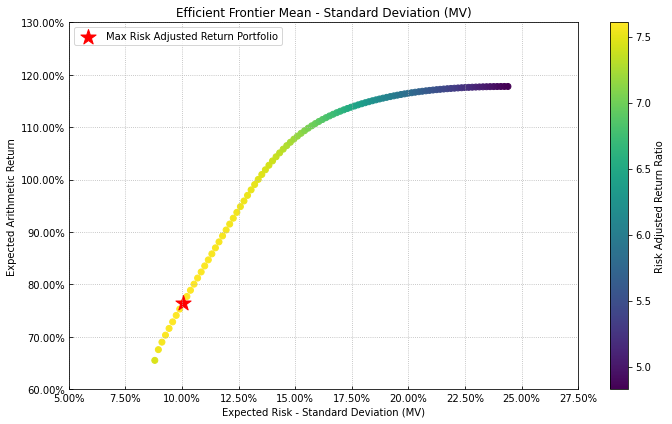

In [326]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

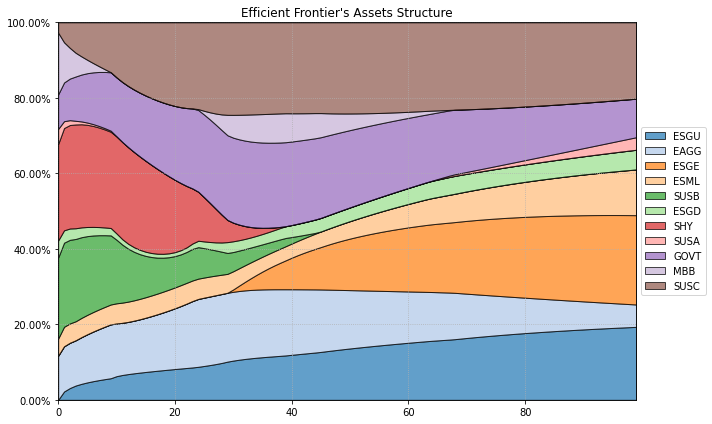

In [327]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [328]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [329]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
ESGU,5.48%,8.71%,11.01%,8.55%,10.46%,15.37%,16.66%,17.65%,4.15%,7.64%,5.69%,7.94%,5.61%
EAGG,13.91%,10.96%,8.71%,8.15%,7.71%,8.83%,8.28%,9.41%,5.31%,8.25%,4.56%,6.29%,4.41%
ESGE,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ESML,5.24%,3.25%,7.06%,8.06%,8.25%,7.95%,8.06%,8.21%,9.06%,8.39%,14.20%,9.17%,8.87%
SUSB,18.98%,16.97%,17.70%,18.61%,18.27%,12.73%,9.11%,6.88%,22.23%,19.27%,19.74%,19.78%,21.91%
ESGD,2.05%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SHY,25.95%,27.24%,28.27%,28.17%,28.23%,24.37%,25.16%,22.45%,21.81%,28.14%,24.19%,27.45%,23.21%
SUSA,0.34%,3.67%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
GOVT,14.92%,9.55%,12.18%,10.91%,14.26%,20.87%,14.98%,14.44%,11.19%,10.89%,14.08%,13.71%,13.08%
MBB,0.69%,17.95%,12.30%,13.74%,9.01%,9.87%,17.75%,20.96%,20.18%,12.97%,15.29%,11.36%,17.97%


<Axes: >

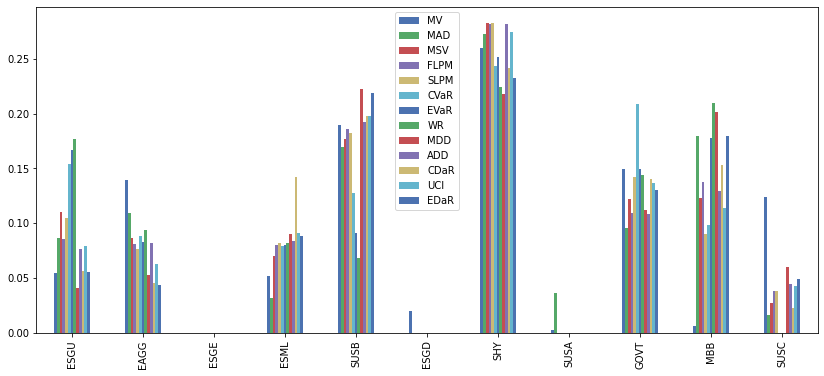

In [330]:
# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)